In [1]:
!mkdir -p results results/dqn

In [2]:
%matplotlib inline
import pandas as pd

In [3]:
import gym
from gym.wrappers import Monitor

In [4]:
import base
from src.agents import DeepQAgent
from src.downsamplers import downsample_space_invaders

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Environment

In [5]:
env = gym.make('SpaceInvaders-v4')
env = Monitor(env, './monitor/dqn/non-deterministic')

In [6]:
env.observation_space

Box(210, 160, 3)

In [7]:
env.action_space

Discrete(6)

# Agent

In [8]:
agent = DeepQAgent(env, downsample_space_invaders, 
    replay_memory_size=0,
    render_mode='rgb_array'
)
agent.model.load_weights('./models/dqn/space_invaders-nondeterministic.h5')
agent

DeepQAgent(
    env=<Monitor<TimeLimit<AtariEnv<SpaceInvaders-v4>>>>,
    downsample=Downsampler(y=(0, 15), x=(0, 1), cut=[]),
    replay_memory_size=0,
    agent_history_length=4,
    discount_factor=0.99,
    update_frequency=4,
    optimizer=<keras.optimizers.RMSprop object at 0x113673fd0>,
    exploration_rate=AnnealingVariable(initial_value=1.0, final_value=0.1, steps=1000000),
    null_op_max=30,
    null_op=0,
    loss=<function huber_loss at 0x1215e10d0>,
    image_size=(84, 84),
    render_mode='rgb_array'
)

In [9]:
fps = None # 60
scores = agent.play(games=100, fps=fps)
scores = pd.Series(scores)
scores

100%|██████████| 100/100 [06:34<00:00,  3.95s/game]


0     26.0
1     16.0
2     15.0
3     18.0
4     16.0
5     16.0
6     10.0
7     24.0
8     18.0
9     14.0
10    22.0
11    27.0
12     6.0
13     7.0
14    14.0
15     3.0
16    16.0
17    11.0
18    10.0
19    22.0
20    16.0
21    14.0
22    18.0
23    22.0
24    22.0
25    16.0
26     9.0
27    14.0
28    11.0
29    11.0
      ... 
70    11.0
71    30.0
72    13.0
73    17.0
74    15.0
75    21.0
76    17.0
77    16.0
78     4.0
79    16.0
80    14.0
81    16.0
82    25.0
83    23.0
84    17.0
85    20.0
86    21.0
87    17.0
88    25.0
89    10.0
90    28.0
91    23.0
92    13.0
93    11.0
94    24.0
95     7.0
96    14.0
97    20.0
98    20.0
99    21.0
Length: 100, dtype: float64

In [10]:
scores.to_csv('results/double_dqn/nondeterministic.csv')

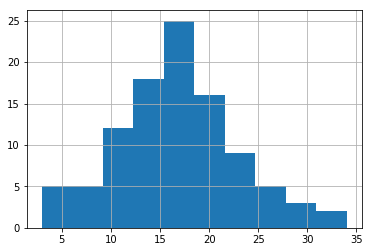

In [11]:
_ = scores.hist()

In [12]:
scores.describe()

count    100.000000
mean      16.770000
std        6.013209
min        3.000000
25%       13.000000
50%       16.000000
75%       20.250000
max       34.000000
dtype: float64